Consensus Timeのプロット

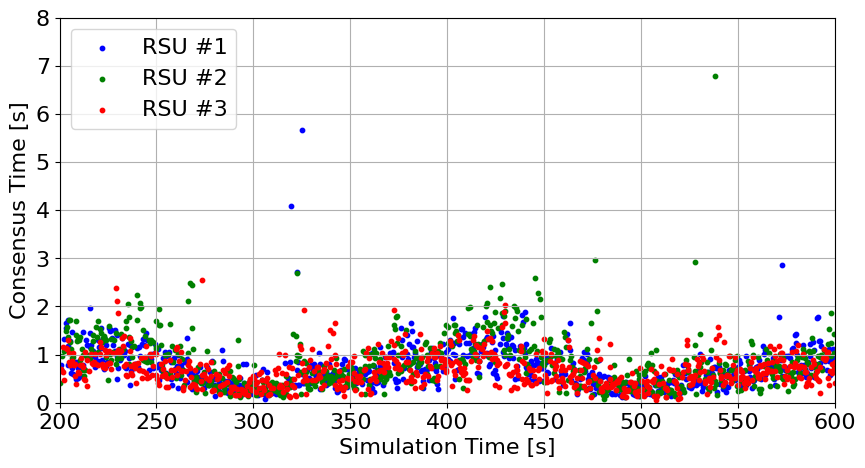

In [8]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list



# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 160
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    # input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    input_folder_path = "../../results/multi_rsu_single_street_congestion_with_immu/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.scatter(start_time_2lists[0], consensus_time_2lists[0], c='blue', marker='o', s=10, label='RSU #1')
plt.scatter(start_time_2lists[1], consensus_time_2lists[1], c='green', marker='o', s=10, label='RSU #2')
plt.scatter(start_time_2lists[2], consensus_time_2lists[2], c='red', marker='o', s=10, label='RSU #3')
plt.xlabel('Simulation Time [s]', fontsize=16)
plt.ylabel('Consensus Time [s]', fontsize=16)

plt.ylim(0, 8)
plt.xlim(200, 600)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=16)
plt.show()






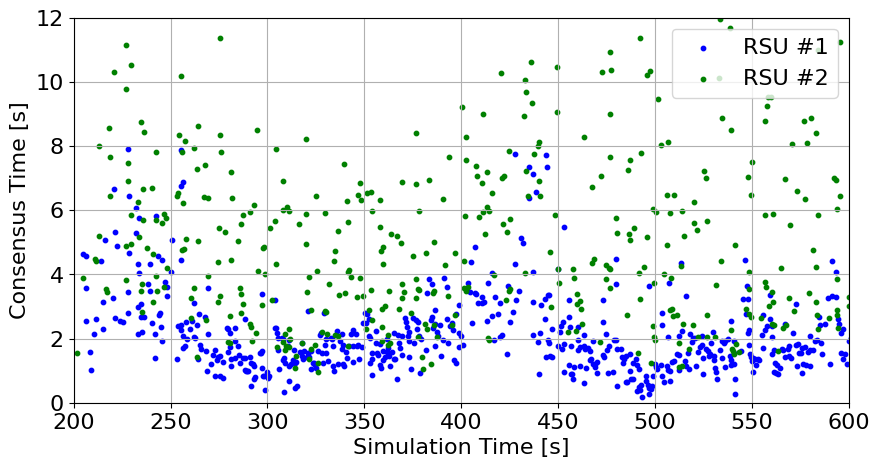

CDF(Cumulative Distribution Function)のプロット

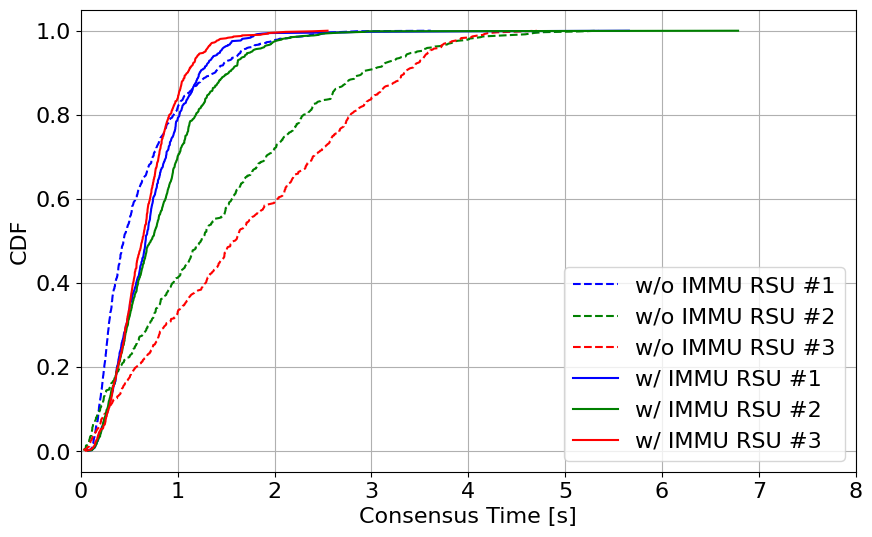

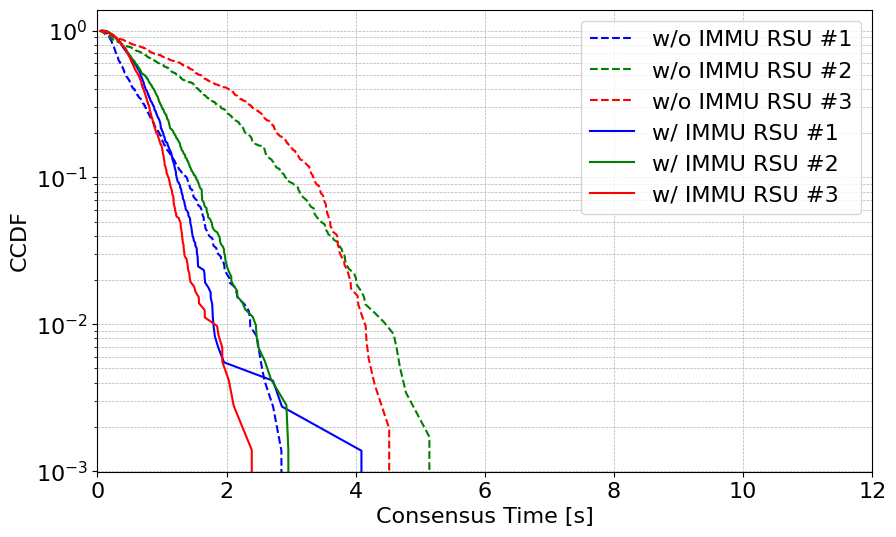

In [6]:
import numpy as np
from scipy.stats import norm

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 160
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]
time_threshold = 600

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []

for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_single_street_congestion/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    # 条件を満たすインデックスを取得
    filtered_indices = [i for i, time in enumerate(start_time_list) if time < time_threshold]
    
    # インデックスに基づいてリストをフィルタリング
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]
    
    start_time_2lists_no_rl.append(filtered_start_time_list)
    consensus_time_2lists_no_rl.append(filtered_consensus_time_list)


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_single_street_congestion_with_immu/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

    # 条件を満たすインデックスを取得
    filtered_indices = [i for i, time in enumerate(start_time_list) if time < time_threshold]
    
    # インデックスに基づいてリストをフィルタリング
    filtered_start_time_list = [start_time_list[i] for i in filtered_indices]
    filtered_consensus_time_list = [consensus_time_list[i] for i in filtered_indices]
    
    start_time_2lists_with_rl.append(filtered_start_time_list)
    consensus_time_2lists_with_rl.append(filtered_consensus_time_list)


# # データをソート
# sorted_data = np.sort(consensus_time_list)
# # 経験的なCDFの計算
# cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# # プロット
# plt.figure(figsize=(8, 5))
# plt.plot(sorted_data, cdf_values, marker='o', linestyle='-', color='b', label="Empirical CDF")


# plt.xlabel("Data values")
# plt.ylabel("CDF")
# plt.title("Cumulative Distribution Function (CDF)")
# plt.grid(True)
# plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))

# # consensus_time_2lists_no_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='-', label=f"No RL Proposer {i}")

# # consensus_time_2lists_with_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='--', label=f"With RL Proposer {i}")


# # グラフの詳細設定（フォントサイズの調整）
# plt.xlabel("Consensus Time", fontsize=14)
# plt.ylabel("CDF", fontsize=14)
# plt.title("Cumulative Distribution Function (CDF) for Consensus Times", fontsize=16)
# plt.xlim(0, 30)  # X軸の最大値を30に設定
# plt.grid(True)
# plt.legend(fontsize=12)
# plt.show()


# 色のリスト
colors = ['b', 'g', 'r']  # プロポーザごとに異なる色を設定

# CDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"w/o IMMU RSU #{i+1}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"w/ IMMU RSU #{i+1}")

plt.xlabel("Consensus Time [s]", fontsize=16)
plt.ylabel("CDF", fontsize=16)
# plt.title("CDF for Consensus Times", fontsize=20)
plt.xlim(0, 8)  # X軸の最大値を30に設定
plt.grid(True)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"w/o IMMU RSU #{i+1}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"w/ IMMU RSU #{i+1}")

# 縦軸を対数スケールに設定
plt.yscale("log")

# グラフの詳細設定
plt.xlabel("Consensus Time [s]", fontsize=16)
plt.ylabel("CCDF", fontsize=16)
# plt.title("CCDF for Consensus Times", fontsize=20)
plt.xlim(0, 12)  # X軸の最大値を30に設定
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

標準偏差の時間変化

In [11]:
import pandas as pd
import ast
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list



# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 160
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    # input_folder_path = "../../results/multi_rsu_congestion_with_immu/wd/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    input_folder_path = "../../results/multi_rsu_single_street_congestion_with_immu/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

    print(start_time_list, consensus_time_list)




[201.608, 202.021, 202.202, 202.771, 203.025, 204.078, 204.671, 205.81, 205.651, 206.131, 206.751, 206.769, 207.717, 207.721, 209.60399999999998, 209.898, 210.53, 211.224, 211.448, 212.203, 213.799, 213.765, 213.765, 214.975, 215.349, 215.752, 215.647, 216.434, 216.824, 217.578, 218.445, 218.676, 219.269, 220.065, 221.828, 222.388, 222.952, 223.728, 223.805, 224.054, 225.204, 226.105, 226.63, 227.339, 227.79500000000002, 228.077, 227.612, 228.903, 229.598, 229.899, 229.712, 231.218, 231.84, 232.418, 232.82, 232.673, 234.07, 234.027, 234.952, 235.863, 236.102, 236.74099999999999, 236.824, 237.002, 238.242, 238.644, 239.601, 239.27100000000002, 239.526, 240.064, 240.963, 241.30599999999998, 242.128, 242.898, 243.45499999999998, 243.813, 244.58100000000002, 244.841, 245.475, 245.74099999999999, 246.814, 247.19299999999998, 247.47899999999998, 248.314, 248.679, 249.572, 249.52, 250.27100000000002, 251.253, 251.83100000000002, 252.025, 252.55, 253.091, 253.1, 254.378, 254.378, 255.430999999

[201.608, 202.021, 202.202, 202.771, 203.025, 204.078, 204.671, 205.81, 205.651, 206.131, 206.751, 206.769, 207.717, 207.721, 209.60399999999998, 209.898, 210.53, 211.224, 211.448, 212.203, 213.799, 213.765, 213.765, 214.975, 215.349, 215.752, 215.647, 216.434, 216.824, 217.578, 218.445, 218.676, 219.269, 220.065, 221.828, 222.388, 222.952, 223.728, 223.805, 224.054, 225.204, 226.105, 226.63, 227.339, 227.79500000000002, 228.077, 227.612, 228.903, 229.598, 229.899, 229.712, 231.218, 231.84, 232.418, 232.82, 232.673, 234.07, 234.027, 234.952, 235.863, 236.102, 236.74099999999999, 236.824, 237.002, 238.242, 238.644, 239.601, 239.27100000000002, 239.526, 240.064, 240.963, 241.30599999999998, 242.128, 242.898, 243.45499999999998, 243.813, 244.58100000000002, 244.841, 245.475, 245.74099999999999, 246.814, 247.19299999999998, 247.47899999999998, 248.314, 248.679, 249.572, 249.52, 250.27100000000002, 251.253, 251.83100000000002, 252.025, 252.55, 253.091, 253.1, 254.378, 254.378, 255.430999999

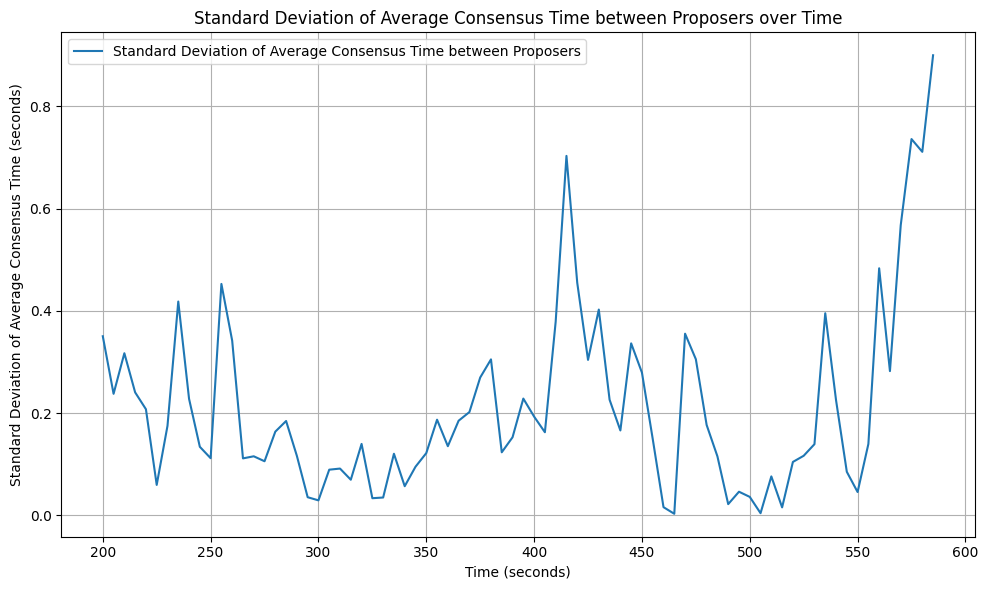

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):
    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 160
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists = []
consensus_time_2lists = []

# 時間帯を10秒刻みで区切る
time_bins = np.arange(200, 601, 5)

# 各プロポーザーのstart_time_listとconsensus_time_listを取得
for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_single_street_congestion_with_immu/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

    print(start_time_list, consensus_time_list)

# 各時間帯での10秒間の合意形成時間の平均を計算
averages_by_time_bin = {proposer_id: [] for proposer_id in proposer_id_list}

# 10秒間隔での合意形成時間の平均を計算
for time_bin in time_bins:
    for proposer_id in proposer_id_list:
        consensus_times_in_bin = []

        start_times = start_time_2lists[proposer_id]
        consensus_time_list = consensus_time_2lists[proposer_id]
        
        # 現在の時間帯に該当するconsensus_timeを収集
        for start_time, consensus_time in zip(start_times, consensus_time_list):
            if time_bin <= start_time < time_bin + 10:  # 10秒刻みでチェック
                consensus_times_in_bin.append(consensus_time)

        if consensus_times_in_bin:
            averages_by_time_bin[proposer_id].append(np.mean(consensus_times_in_bin))
        else:
            averages_by_time_bin[proposer_id].append(np.nan)

# proposer間の平均時間の標準偏差を算出
std_devs_by_time_bin = []

for i in range(len(time_bins)):
    time_bin_averages = []
    for proposer_id in proposer_id_list:
        time_bin_averages.append(averages_by_time_bin[proposer_id][i])

    # 各時間帯での平均の標準偏差を計算
    std_devs_by_time_bin.append(np.std(time_bin_averages))

# プロット
plt.figure(figsize=(10, 6))

# proposer間の平均合意形成時間の標準偏差を時間変化としてプロット
plt.plot(time_bins, std_devs_by_time_bin, label="Standard Deviation of Average Consensus Time between Proposers")
plt.xlabel("Time (seconds)")
plt.ylabel("Standard Deviation of Average Consensus Time (seconds)")
plt.title("Standard Deviation of Average Consensus Time between Proposers over Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


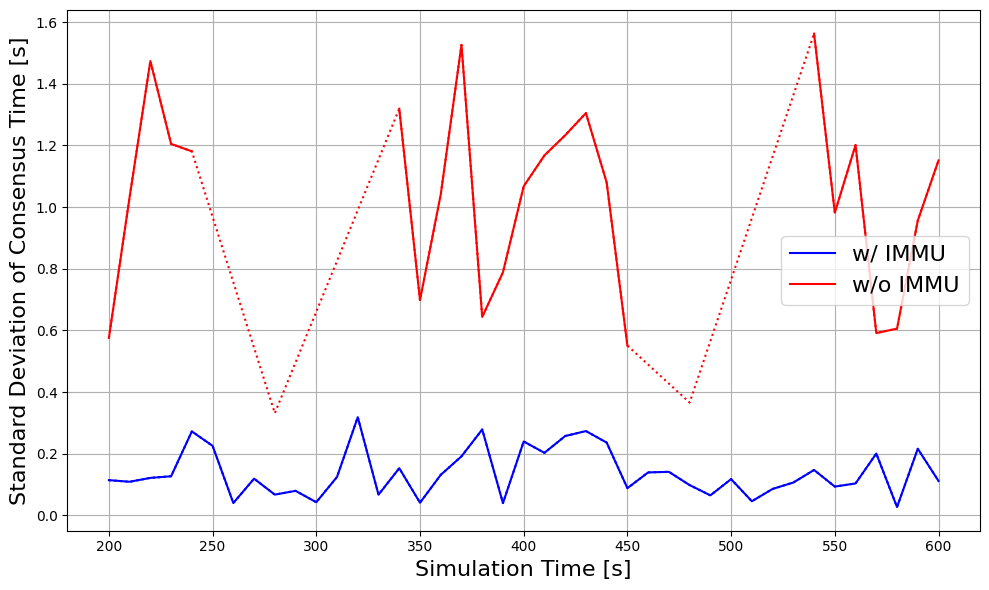

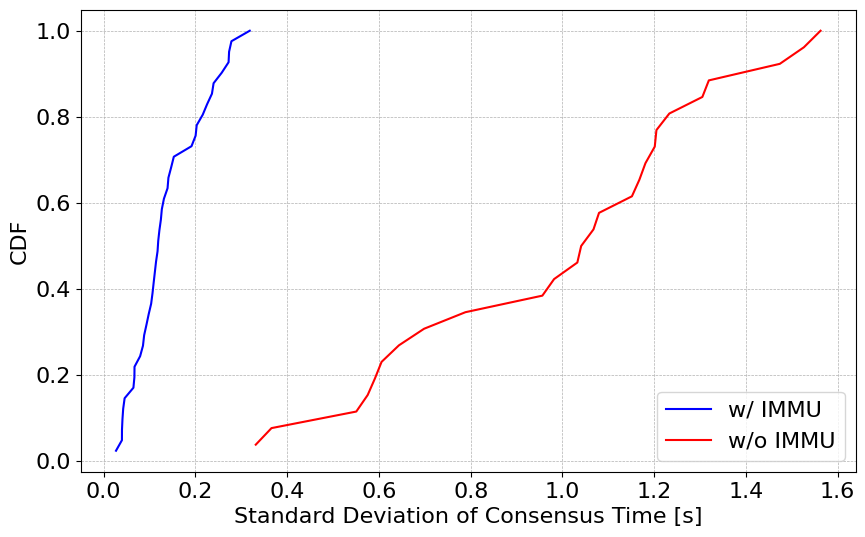

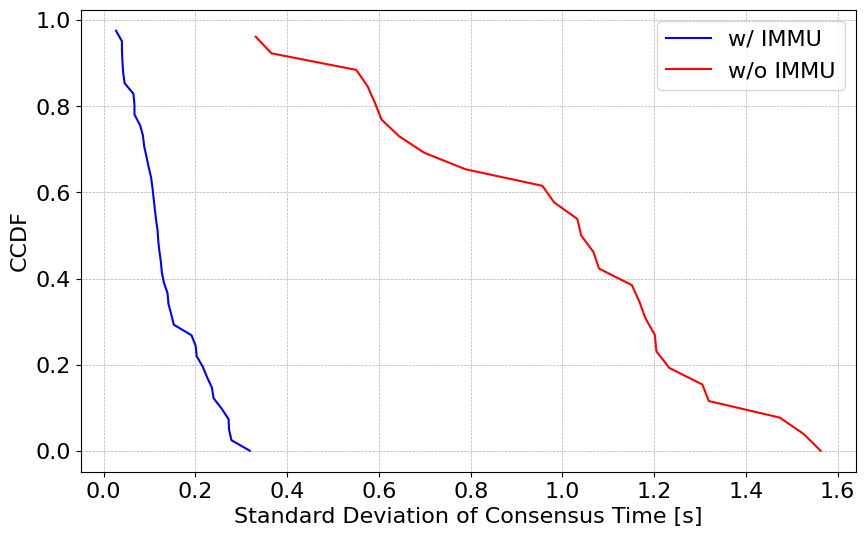

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_consensus_time(input_folder_path):
    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


def get_cdf_ccdf(data):
    # 有効なデータのみ取得（nanを除去）
    data = np.array(data)
    data = data[~np.isnan(data)]
    
    # CDFの計算
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # CCDFの計算 (1 - CDF)
    ccdf = 1 - cdf
    
    return sorted_data, cdf, ccdf


# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 70
min_vehicle_speed = 30
proposer_num = 3
validator_num = 160
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

# 時間帯を10秒刻みで区切る
time_bins = np.arange(200, 601, 10)

# データを格納するためのリスト
averages_by_time_bin_1 = {proposer_id: [] for proposer_id in proposer_id_list}
averages_by_time_bin_2 = {proposer_id: [] for proposer_id in proposer_id_list}

# 各プロポーザーのstart_time_listとconsensus_time_listを取得
for proposer_id in proposer_id_list:
    # 1つ目のinput_folder_path
    input_folder_path_1 = "../../results/multi_rsu_single_street_congestion_with_immu/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list_1, consensus_time_list_1 = get_consensus_time(input_folder_path_1)

    # 2つ目のinput_folder_path
    input_folder_path_2 = "../../results/multi_rsu_single_street_congestion/vs70_30/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list_2, consensus_time_list_2 = get_consensus_time(input_folder_path_2)

    # 10秒間隔での合意形成時間の平均を計算
    for time_bin in time_bins:
        consensus_times_in_bin_1 = []
        consensus_times_in_bin_2 = []

        # 1つ目のデータ
        for start_time, consensus_time in zip(start_time_list_1, consensus_time_list_1):
            if time_bin <= start_time < time_bin + 5:
                consensus_times_in_bin_1.append(consensus_time)
        
        # 2つ目のデータ
        for start_time, consensus_time in zip(start_time_list_2, consensus_time_list_2):
            if time_bin <= start_time < time_bin + 5:
                consensus_times_in_bin_2.append(consensus_time)

        # 平均をリストに追加
        if consensus_times_in_bin_1:
            averages_by_time_bin_1[proposer_id].append(np.mean(consensus_times_in_bin_1))
        else:
            averages_by_time_bin_1[proposer_id].append(np.nan)

        if consensus_times_in_bin_2:
            averages_by_time_bin_2[proposer_id].append(np.mean(consensus_times_in_bin_2))
        else:
            averages_by_time_bin_2[proposer_id].append(np.nan)

# proposer間の平均時間の標準偏差を算出
std_devs_by_time_bin_1 = []
std_devs_by_time_bin_2 = []

for i in range(len(time_bins)):
    # 1つ目のinput_folder_pathに基づく平均の標準偏差を計算
    time_bin_averages_1 = []
    for proposer_id in proposer_id_list:
        time_bin_averages_1.append(averages_by_time_bin_1[proposer_id][i])
    std_devs_by_time_bin_1.append(np.std(time_bin_averages_1))

    # 2つ目のinput_folder_pathに基づく平均の標準偏差を計算
    time_bin_averages_2 = []
    for proposer_id in proposer_id_list:
        time_bin_averages_2.append(averages_by_time_bin_2[proposer_id][i])
    std_devs_by_time_bin_2.append(np.std(time_bin_averages_2))

# 補完処理: nanを線形補完
std_devs_by_time_bin_1_interp = pd.Series(std_devs_by_time_bin_1).interpolate().to_numpy()
std_devs_by_time_bin_2_interp = pd.Series(std_devs_by_time_bin_2).interpolate().to_numpy()

# プロット
plt.figure(figsize=(10, 6))

# 補完されていない部分を点線で表示
plt.plot(time_bins, std_devs_by_time_bin_1, label="w/ IMMU", color='blue')
plt.plot(time_bins, std_devs_by_time_bin_2, label="w/o IMMU", color='red')

# 補完後の部分を実線で表示
plt.plot(time_bins, std_devs_by_time_bin_1_interp, color='blue',  linestyle='dotted')
plt.plot(time_bins, std_devs_by_time_bin_2_interp, color='red',  linestyle='dotted')

plt.xlabel("Simulation Time [s]", fontsize=16)
plt.ylabel("Standard Deviation of Consensus Time [s]", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()




# CDFとCCDFの計算
sorted_data_1, cdf_1, ccdf_1 = get_cdf_ccdf(std_devs_by_time_bin_1)
sorted_data_2, cdf_2, ccdf_2 = get_cdf_ccdf(std_devs_by_time_bin_2)

# CDFのプロット
plt.figure(figsize=(10, 6))
# 縦軸を対数スケールに設定
# plt.yscale("log")

plt.plot(sorted_data_1, cdf_1, label="w/ IMMU", color='blue')
plt.plot(sorted_data_2, cdf_2, label="w/o IMMU", color='red')
plt.xlabel("Standard Deviation of Consensus Time [s]", fontsize=16)
plt.ylabel("CDF", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
# 縦軸を対数スケールに設定
# plt.yscale("log")

plt.plot(sorted_data_1, ccdf_1, label="w/ IMMU", color='blue')
plt.plot(sorted_data_2, ccdf_2, label="w/o IMMU", color='red')
plt.xlabel("Standard Deviation of Consensus Time [s]", fontsize=16)
plt.ylabel("CCDF", fontsize=16)
plt.legend(fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
